# Rankine Oval

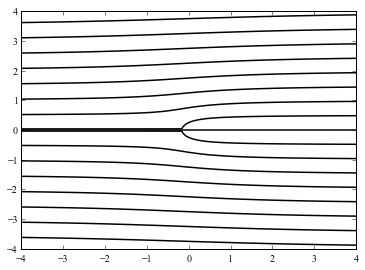

In [8]:
%matplotlib inline

# import modules
import numpy as np
from math import pi, sqrt, atan2, sin
import matplotlib.pyplot as plt


# stream functions for a source and uniform flow

def source(m, theta):
    return m/(2*pi)*theta

def uniform(Uinf, y):
    return Uinf*y

# setup a grid
nx = 100
ny = 100
x = np.linspace(-4, 4, nx)
y = np.linspace(-4, 4, ny)
[X, Y] = np.meshgrid(x, y)
stream = np.zeros((nx, ny))

# initialize source strength and freestream velocity
m = 1.0
Uinf = 1.0

# loop through points on the grid
for i in range(nx):
    for j in range(ny):
        x = X[i, j]
        y = Y[i, j]
        theta = atan2(y, x)
        
        stream[i, j] = uniform(Uinf, y) + source(m, theta)

# plot results
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
plt.contour(X, Y, stream, 20, colors='k')
plt.show()

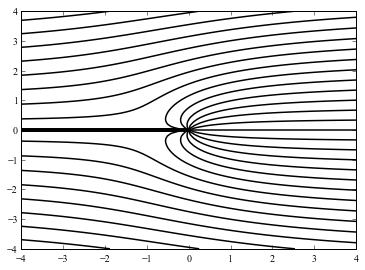

None

In [9]:
# an interactive version where you can change source strength
# this will not work on nbviewer.  You can view it locally if
# you've installed Jupyter notebook or upload to http://try.jupyter.org

from IPython.html.widgets import interact

@interact(m=(0.0, 10.0, 0.5))
def strength(m):
    
    for i in range(nx):
        for j in range(ny):
            x = X[i, j]
            y = Y[i, j]
            theta = atan2(y, x)

            stream[i, j] = uniform(Uinf, y) + source(m, theta)

    plt.figure()
    plt.contour(X, Y, stream, 30, colors='k')
    plt.show()
    

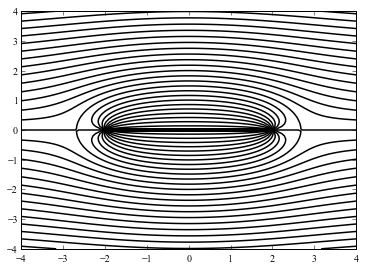

None

In [10]:
# an interactive version with a source and a sink

@interact(m=(0.0, 10.0, 0.5))
def oval(m):

    # freestream velocity
    Uinf = 1.0

    # x position of source and sink
    xc1 = -2.0
    xc2 = 2.0

    # loop over grid
    for i in range(nx):
        for j in range(ny):
            x = X[i, j]
            y = Y[i, j]
            theta1 = atan2(y, x-xc1)
            theta2 = atan2(y, x-xc2)

            stream[i, j] = uniform(Uinf, y) + source(m, theta1) + source(-m, theta2)

    plt.figure()
    plt.contour(X, Y, stream, 30, colors='k')
    plt.show()
